## Lab4

## import libs and connect to database

In [100]:
import pandas
import configparser
import psycopg2

In [101]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [102]:
cur=conn.cursor()

## question1

In [103]:
sql_ql = '''
            select * from gp3.student
         '''

In [104]:
df = pandas.read_sql_query(sql_ql,conn)
df[:]

,s_email,s_name,major
0,johnsmith@dukes.edu,John Smith,IA
1,chrisjohnson@dukes.jmu.edu,Chris Johnson,IA
2,rcasperlj@dukes.jmu.edu,Robert Casper,IA
3,estepme@dukes.jmu.edu,Morgan Estep,IA


## question2

In [105]:
q2_sql = """

select gp3.professors.p_name,
        gp3.course.c_name
from gp3.professors
inner join gp3.course
on gp3.professors.p_email = gp3.course.p_email

"""

print(q2_sql)



select gp3.professors.p_name,
        gp3.course.c_name
from gp3.professors
inner join gp3.course
on gp3.professors.p_email = gp3.course.p_email




In [106]:
df = pandas.read_sql_query(q2_sql,conn)
df[:]

,p_name,c_name
0,Xuebin Wei,Data Mining
1,Noel Hendrickson,Counterfactual Reasoning
2,Stephen Marrin,Issues in Intellignece
3,Orlandrew Danzell,Anti-Money Laundering
4,Kathleen Moore,Cyber Intelligence


## question3

In [107]:
q3_sql = """
            select count(c_number) as enrolled,
            c_number
            from gp3.enroll_list
            group by c_number
         """

<AxesSubplot:xlabel='c_number'>

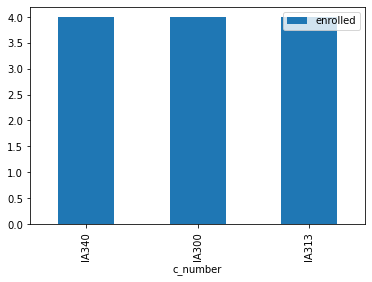

In [108]:
df = pandas.read_sql_query(q3_sql,conn)

df.plot.bar(x='c_number',y='enrolled')

## question4

In [109]:
q4_sql = """

select gp3.professors.p_name,
            count (gp3.course.c_name) as num_course
from gp3.professors
inner join gp3.course
on gp3.professors.p_email = gp3.course.p_email
group by gp3.professors.p_name
order by num_course desc

"""

print(q2_sql)



select gp3.professors.p_name,
        gp3.course.c_name
from gp3.professors
inner join gp3.course
on gp3.professors.p_email = gp3.course.p_email




In [110]:
df = pandas.read_sql_query(q4_sql,conn)

df[:]

,p_name,num_course
0,Noel Hendrickson,1
1,Xuebin Wei,1
2,Kathleen Moore,1
3,Stephen Marrin,1
4,Orlandrew Danzell,1


<AxesSubplot:xlabel='p_name'>

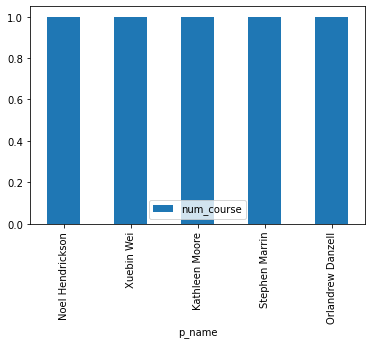

In [111]:
df = pandas.read_sql_query(q4_sql,conn)

df.plot.bar(x='p_name',y='num_course')

## question5

In [112]:
q5_sql_professors = """

insert into gp3.professors (p_email,p_name,office)
values ('moore8ka@jmu.edu','Kathleen Moore','CS116')

"""

print(q5_sql_professors)



insert into gp3.professors (p_email,p_name,office)
values ('moore8ka@jmu.edu','Kathleen Moore','CS116')




In [113]:
df = pandas.read_sql_query('select * from gp3.professors',conn)

df[:]

,p_email,p_name,office
0,weixx@jmu.edu,Xuebin Wei,EnGeo112
1,hendrinx@jmu.edu,Noel Hendrickson,Virtual
2,danzelox@jmu.edu,Orlandrew Danzell,ISAT/CS107
3,marrinsp@jmu.edu,Stephen Marrin,EnGeo2104
4,moore8ka@jmu.edu,Kathleen Moore,CS116


In [120]:
q5_sql_course = """

    insert into gp3.course (c_number,c_name,room,p_email)
    values ('{}','{}','{}','{}')
    """.format('IA240','Tech. Apps.','CS116','moore8ka@jmu.edu')

print(q5_sql_course)



    insert into gp3.course (c_number,c_name,room,p_email)
    values ('IA240','Tech. Apps.','CS116','moore8ka@jmu.edu')
    


In [121]:
cur.execute(q5_sql_course)

In [122]:
conn.commit()

In [123]:
df = pandas.read_sql_query('select * from gp3.course',conn)

df[:]

,c_number,c_name,room,p_email
0,IA340,Data Mining,EnGeo112,weixx@jmu.edu
1,IA313,Counterfactual Reasoning,EnGeo2104,hendrinx@jmu.edu
2,IA300,Issues in Intellignece,ISAT/CS150,marrinsp@jmu.edu
3,IA480,Anti-Money Laundering,ISAT/CS148,danzelox@jmu.edu
4,IA365,Cyber Intelligence,CS116,moore8ka@jmu.edu
5,IA240,Tech. Apps.,CS116,moore8ka@jmu.edu


## question6

In [132]:
q6_sql_course = """
         update gp3.course
         set p_email = '{}'
         where p_email = '{}'
         """.format('moore8ka@jmu.edu','weixx@jmu.edu')

In [133]:
cur.execute(q6_sql_course)

In [134]:
conn.commit()

In [135]:
df = pandas.read_sql_query('select * from gp3.course',conn)

df[:]

,c_number,c_name,room,p_email
0,IA313,Counterfactual Reasoning,EnGeo2104,hendrinx@jmu.edu
1,IA300,Issues in Intellignece,ISAT/CS150,marrinsp@jmu.edu
2,IA480,Anti-Money Laundering,ISAT/CS148,danzelox@jmu.edu
3,IA365,Cyber Intelligence,CS116,moore8ka@jmu.edu
4,IA240,Tech. Apps.,CS116,moore8ka@jmu.edu
5,IA340,Data Mining,EnGeo112,moore8ka@jmu.edu


In [136]:
q6_sql_professors = """
                    delete from gp3.professors
                    where p_email = 'weixx@jmu.edu'
                    """
print(q6_sql_professors)


                    delete from gp3.professors
                    where p_email = 'weixx@jmu.edu'
                    


In [138]:
cur.execute(q6_sql_professors)

In [139]:
conn.commit()

In [140]:
df = pandas.read_sql_query('select * from gp3.professors',conn)

df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,Noel Hendrickson,Virtual
1,danzelox@jmu.edu,Orlandrew Danzell,ISAT/CS107
2,marrinsp@jmu.edu,Stephen Marrin,EnGeo2104
3,moore8ka@jmu.edu,Kathleen Moore,CS116
